# Análise Exploratória dos dados de Mortalidade Neonatal
# Ana Carolina Chebel Pelissari

# <font color='blue'>Importação das bibliotecas necessárias</font>

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from  matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
import seaborn as sns
import math

# <font color='blue'>Importação do arquivo csv como dataframe</font>

Link da Base de dados : https://doi.org/10.7303/syn22240254

In [9]:
df=pd.read_csv('df_neonatal_sao_paulo.csv', low_memory=False)
#antigo : df_cat_num_new.csv

In [8]:
print("The dataset has {} many rows and {} columns".format(df.shape[0], df.shape[1]))

The dataset has 1435834 many rows and 25 columns


In [10]:
df.columns

Index(['Unnamed: 0', 'n_tp_ocorrencia', 'n_nu_idade', 'n_tp_estado_civil',
       'n_tp_escolaridade', 'n_qt_nascidos_vivos', 'n_qt_nascidos_mortos',
       'n_tp_gestacao', 'n_tp_gravidez', 'n_tp_parto', 'n_tp_prenatal',
       'n_nu_apgar1', 'n_nu_apgar5', 'n_nu_peso', 'n_st_malformacao',
       'n_tp_raca_cor_mae', 'n_qt_gestacao_anterior', 'n_qt_parto_normal',
       'n_qt_parto_cesarea', 'n_nu_semana_gestacao', 'n_tp_apresentacao',
       'n_tp_nascimento_assistido', 'n_tp_funcao_responsavel',
       'n_tp_grupo_robson', 'morte_menor_28d'],
      dtype='object')

# <font color='blue'>Criação dos gráficos </font> 

In [11]:
df_death = df[df["morte_menor_28d"] == 1]
#df_death.count()
#df_death.index = pd.to_datetime(df_death["date_death"])

In [12]:
df_alive = df[df["morte_menor_28d"] == 0]
#df_alive.count()

# Gráfico que apresenta a distribuição de vivos e mortos

Text(0.42, 0.5, '1435834 registros')

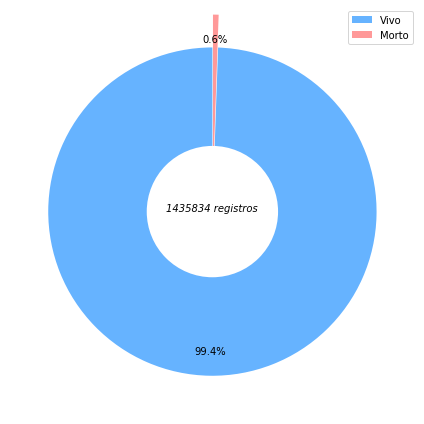

In [13]:
plt.figure(figsize=(8,6))

values = df.groupby('morte_menor_28d')['morte_menor_28d'].count()
n_samples = df.shape[0]

labels = ['Vivo', 'Morto']
explode = (0, 0.2) 
colors = ['#66b3ff','#ff9999']
plt.pie(values, colors = colors, autopct='%1.1f%%',
        startangle=90, pctdistance=0.85, explode = explode)

plt.legend(labels,loc=1)
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)  
plt.tight_layout()

fig.text(0.42, 0.5, "{} registros".format(n_samples), style='italic', fontsize=10)

#dst = "../img_saved/sp_pt/"
#if os.path.isdir(dst) == False:
#    os.makedirs(dst)
#dst = dst + "/pieplot_class_distribution.png"
#plt.savefig(dst)
#plt.show()

# Gráfico que apresenta os anos de escolaridade das gestantes

Text(0, 0.5, 'Idade')

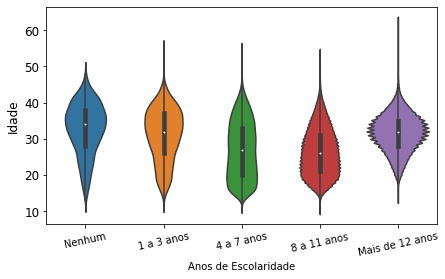

In [14]:
plt.figure(figsize=(7,4))

sns.violinplot(x='n_tp_escolaridade', y='n_nu_idade', data=df, whis=[5, 95])

labels=['Nenhum','1 a 3 anos','4 a 7 anos','8 a 11 anos', 'Mais de 12 anos']
pos = np.arange(len(labels))
plt.xticks(pos, labels, fontsize=10, rotation=12)
plt.yticks(fontsize=12)

plt.xlabel('Anos de Escolaridade')
plt.ylabel('Idade', fontsize=12)

#dst = "../img_saved/sp_pt/"
#if os.path.isdir(dst) == False:
#    os.makedirs(dst)
#dst = dst + "/death_boxplot_n_nu_idade_n_tp_escolaridade_sp.png"
#plt.savefig(dst)
#plt.show()

# <font color='blue'>Análise de cada variável relevante para o estudo</font>

# <font color='blue'>Divide o dataset em mortos e vivos</font>

In [15]:
df_alive = df[df["morte_menor_28d"] == 0]
df_dead = df[df["morte_menor_28d"] == 1]

In [75]:
df_alive.shape

(1427906, 42)

In [77]:
df_dead.shape

(7928, 42)

# <font color='blue'>Variáveis Categóricas</font>

# Consultas Prénatais

Text(0.45, 0.45, 'Número de consultas')

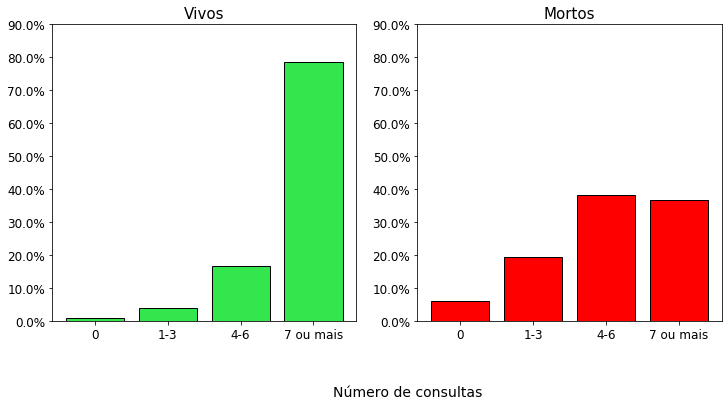

In [16]:
#função que filtra os dados e agrupa em categorias

def n_tp_prenatal(x): 
    if x == 1: 
        return '0' 
    elif x == 2: 
        return '1-3' 
    elif x == 3:
        return '4-6'
    else:
        return '7 ou mais'

#preparação dos dados para os gráficos

#mortos
n_tp_prenatal_dead = df_dead['n_tp_prenatal'].value_counts().rename("quantidade").sort_index().reset_index()
n_tp_prenatal_dead['index']=n_tp_prenatal_dead['index'].apply(n_tp_prenatal)
n_tp_prenatal_dead['quantidade']=n_tp_prenatal_dead['quantidade'].map(lambda x : (x/df_dead.shape[0])*100)
#n_tp_prenatal_dead=n_tp_prenatal_dead.sort_values(by='index')


#vivos
n_tp_prenatal_alive = df_alive['n_tp_prenatal'].value_counts().rename("quantidade").sort_index().reset_index()
n_tp_prenatal_alive['index']=n_tp_prenatal_alive['index'].apply(n_tp_prenatal)
n_tp_prenatal_alive['quantidade']=n_tp_prenatal_alive['quantidade'].map(lambda x : (x/df_alive.shape[0])*100)
#n_tp_prenatal_alive=n_tp_prenatal_alive.sort_values(by='index')


#geração dos gráficos
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,12))

#plot de vivos
plot1 = plt.subplot(221)
plot1.bar(n_tp_prenatal_alive['index'], n_tp_prenatal_alive['quantidade'], color=(0.2,0.9,0.3), edgecolor='black')
plot1.set_ylim(0,90)
plot1.set_yticklabels(map('{:.1f}%'.format, plot1.yaxis.get_majorticklocs()), fontsize=12)
plot1.set_xticklabels(n_tp_prenatal_alive['index'], fontsize=12)
plot1.set_title('Vivos', fontsize=15)

#plot de mortos
plot2 = plt.subplot(222)
plot2.bar(n_tp_prenatal_dead['index'], n_tp_prenatal_dead['quantidade'], color='r', edgecolor='black')
plot2.set_ylim(0,90)
plot2.set_yticklabels(map('{:.1f}%'.format, plot2.yaxis.get_majorticklocs()), fontsize=12)
plot2.set_xticklabels(n_tp_prenatal_dead['index'], fontsize=12)
plot2.set_title('Mortos', fontsize=15)

fig.text(0.45,0.45, 'Número de consultas',fontsize=14)

#antiga cor : 0.5,0.1,0.5,0.6

# Estado Civil da gestante

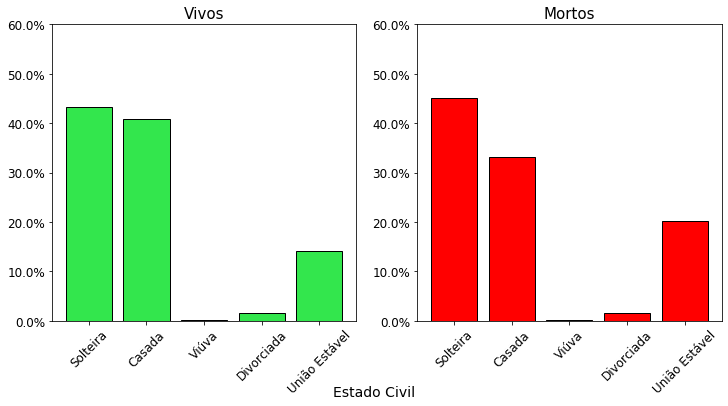

In [17]:
# coluna/variavel : n_tp_estado_civil
# labels : ['Single', 'Married', 'Widowed', 'Divorced', 'Stable Union']

#função que filtra os dados e agrupa em categorias

def n_tp_estado_civil(x): 
    if x == 1: 
        return 'Solteira' 
    elif x == 2: 
        return 'Casada' 
    elif x == 3:
        return 'Viúva'
    elif x == 4:
        return 'Divorciada'
    else:
        return 'União Estável'

#preparação dos dados para os gráficos

#mortos
n_tp_estado_civil_dead = df_dead['n_tp_estado_civil'].value_counts().rename("quantidade").sort_index().reset_index()
n_tp_estado_civil_dead['index']=n_tp_estado_civil_dead['index'].apply(n_tp_estado_civil)
n_tp_estado_civil_dead['quantidade']=n_tp_estado_civil_dead['quantidade'].map(lambda x : (x/df_dead.shape[0])*100)
#n_tp_estado_civil_dead=n_tp_estado_civil_dead.sort_values(by='index')


#vivos
n_tp_estado_civil_alive = df_alive['n_tp_estado_civil'].value_counts().rename("quantidade").sort_index().reset_index()
n_tp_estado_civil_alive['index']=n_tp_estado_civil_alive['index'].apply(n_tp_estado_civil)
n_tp_estado_civil_alive['quantidade']=n_tp_estado_civil_alive['quantidade'].map(lambda x : (x/df_alive.shape[0])*100)
#n_tp_estado_civil_alive=n_tp_estado_civil_alive.sort_values(by='index')


#geração dos gráficos
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,12))

#plot de vivos
plot1 = plt.subplot(221)
plot1.bar(n_tp_estado_civil_alive['index'], n_tp_estado_civil_alive['quantidade'], color=(0.2,0.9,0.3), edgecolor='black')
plot1.set_ylim(0,60)
plot1.set_yticklabels(map('{:.1f}%'.format, plot1.yaxis.get_majorticklocs()), fontsize=12)
plot1.set_xticklabels(n_tp_estado_civil_alive['index'], fontsize=12, rotation=45)
plot1.set_title('Vivos', fontsize=15)

#plot de mortos
plot2 = plt.subplot(222)
plot2.bar(n_tp_estado_civil_dead['index'], n_tp_estado_civil_dead['quantidade'], color='r', edgecolor='black')
plot2.set_ylim(0,60)
plot2.set_yticklabels(map('{:.1f}%'.format, plot2.yaxis.get_majorticklocs()), fontsize=12)
plot2.set_xticklabels(n_tp_estado_civil_dead['index'], fontsize=12, rotation=45)
plot2.set_title('Mortos', fontsize=15)

fig.text(0.45,0.45, 'Estado Civil',fontsize=14)

#antiga cor : 0.5,0.1,0.5,0.6


dst = "../img_saved/sp_pt/"
if os.path.isdir(dst) == False:
    os.makedirs(dst)
dst = dst + "/resultados-grafico3.png"
plt.savefig(dst)
plt.show()

# Escolaridade da Gestante

Text(0.45, 0.45, 'Anos de escolaridade')

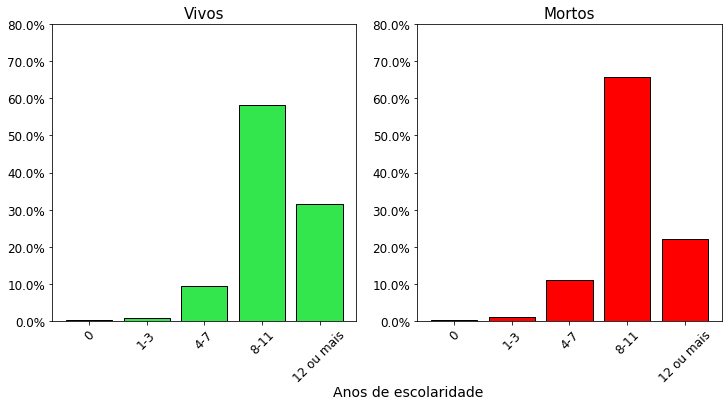

In [18]:
# coluna/variavel : n_tp_escolaridade
# labels : ['0', '1-3', '4-7', '8-11', '12 or more']

#função que filtra os dados e agrupa em categorias

def n_tp_escolaridade(x): 
    if x == 1: 
        return '0' 
    elif x == 2: 
        return '1-3'
    elif x == 3:
        return '4-7'
    elif x == 4:
        return '8-11'
    else:
        return '12 ou mais'

#preparação dos dados para os gráficos

#mortos
n_tp_escolaridade_dead = df_dead['n_tp_escolaridade'].value_counts().rename("quantidade").sort_index().reset_index()
n_tp_escolaridade_dead['index']=n_tp_escolaridade_dead['index'].apply(n_tp_escolaridade)
n_tp_escolaridade_dead['quantidade']=n_tp_escolaridade_dead['quantidade'].map(lambda x : (x/df_dead.shape[0])*100)
#n_tp_escolaridade_dead=n_tp_escolaridade_dead.sort_values(by='index')


#vivos
n_tp_escolaridade_alive = df_alive['n_tp_escolaridade'].value_counts().rename("quantidade").sort_index().reset_index()
n_tp_escolaridade_alive['index']=n_tp_escolaridade_alive['index'].apply(n_tp_escolaridade)
n_tp_escolaridade_alive['quantidade']=n_tp_escolaridade_alive['quantidade'].map(lambda x : (x/df_alive.shape[0])*100)
#n_tp_escolaridade_alive=n_tp_escolaridade_alive.sort_values(by='index')


#geração dos gráficos
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,12))

#plot de vivos
plot1 = plt.subplot(221)
plot1.bar(n_tp_escolaridade_alive['index'], n_tp_escolaridade_alive['quantidade'], color=(0.2,0.9,0.3), edgecolor='black')
plot1.set_ylim(0,80)
plot1.set_yticklabels(map('{:.1f}%'.format, plot1.yaxis.get_majorticklocs()), fontsize=12)
plot1.set_xticklabels(n_tp_escolaridade_alive['index'], fontsize=12, rotation=45)
plot1.set_title('Vivos', fontsize=15)

#plot de mortos
plot2 = plt.subplot(222)
plot2.bar(n_tp_escolaridade_dead['index'], n_tp_escolaridade_dead['quantidade'], color='red', edgecolor='black')
plot2.set_ylim(0,80)
plot2.set_yticklabels(map('{:.1f}%'.format, plot2.yaxis.get_majorticklocs()), fontsize=12)
plot2.set_xticklabels(n_tp_escolaridade_dead['index'], fontsize=12, rotation=45)
plot2.set_title('Mortos', fontsize=15)

fig.text(0.45,0.45, 'Anos de escolaridade',fontsize=14)

#antiga cor : 0.5,0.1,0.5,0.6

# Tipo de gravidez

Text(0.45, 0.45, 'Tipo de gravidez')

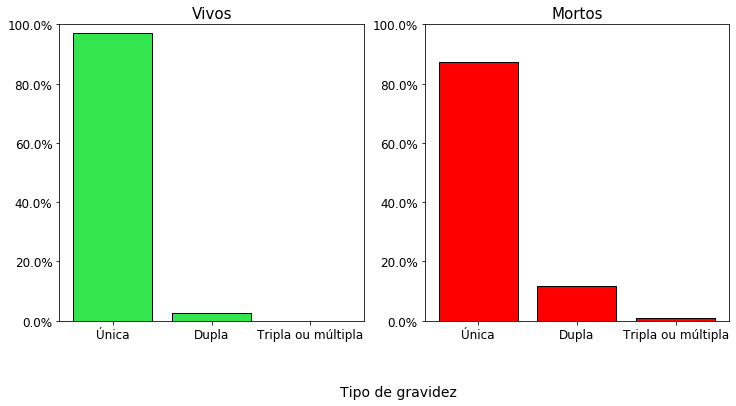

In [19]:
# coluna/variavel : n_tp_gravidez
# labels : ['Única','Dupla','Tripla ou mais'

#função que filtra os dados e agrupa em categorias

def n_tp_gravidez(x): 
    if x == 1.0 : 
        return 'Única' 
    elif x == 2.0 : 
        return 'Dupla'
    else :
        return 'Tripla ou múltipla'

#preparação dos dados para os gráficos

#mortos
n_tp_gravidez_dead = df_dead['n_tp_gravidez'].value_counts().rename("quantidade").sort_index().reset_index()
n_tp_gravidez_dead['index']=n_tp_gravidez_dead['index'].apply(n_tp_gravidez)
n_tp_gravidez_dead['quantidade']=n_tp_gravidez_dead['quantidade'].map(lambda x : (x/df_dead.shape[0])*100)
#n_tp_escolaridade_dead=n_tp_escolaridade_dead.sort_values(by='index')


#vivos
n_tp_gravidez_alive = df_alive['n_tp_gravidez'].value_counts().rename("quantidade").sort_index().reset_index()
n_tp_gravidez_alive['index']=n_tp_gravidez_alive['index'].apply(n_tp_gravidez)
n_tp_gravidez_alive['quantidade']=n_tp_gravidez_alive['quantidade'].map(lambda x : (x/df_alive.shape[0])*100)
#n_tp_escolaridade_alive=n_tp_gravidez_alive.sort_values(by='index')


#geração dos gráficos
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,12))

#plot de vivos
plot1 = plt.subplot(221)
plot1.bar(n_tp_gravidez_alive['index'], n_tp_gravidez_alive['quantidade'], color=(0.2,0.9,0.3), edgecolor='black')
plot1.set_ylim(0,100)
plot1.set_yticklabels(map('{:.1f}%'.format, plot1.yaxis.get_majorticklocs()), fontsize=12)
plot1.set_xticklabels(n_tp_gravidez_alive['index'], fontsize=12)
plot1.set_title('Vivos', fontsize=15)

#plot de mortos
plot2 = plt.subplot(222)
plot2.bar(n_tp_gravidez_dead['index'], n_tp_gravidez_dead['quantidade'], color='r', edgecolor='black')
plot2.set_ylim(0,100)
plot2.set_yticklabels(map('{:.1f}%'.format, plot2.yaxis.get_majorticklocs()), fontsize=12)
plot2.set_xticklabels(n_tp_gravidez_dead['index'], fontsize=12)
plot2.set_title('Mortos', fontsize=15)

fig.text(0.45,0.45, 'Tipo de gravidez',fontsize=14)

#antiga cor : 0.5,0.1,0.5,0.6

# Tipo de parto

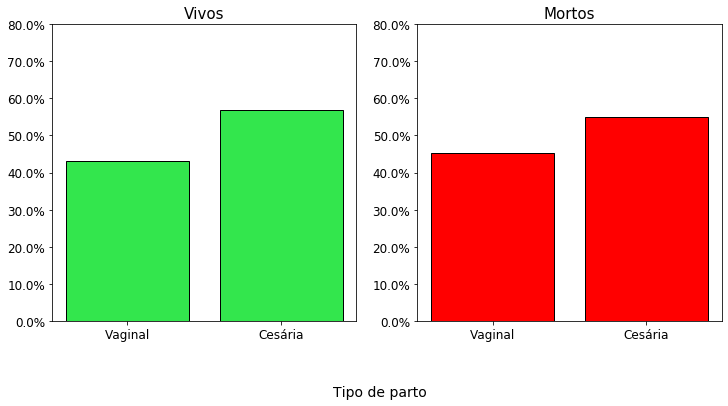

In [20]:
# coluna/variavel : n_tp_parto
# labels : ['Vaginal' (1),'Cesarean section'(2)]

#função que filtra os dados e agrupa em categorias

def n_tp_parto(x): 
    if x == 1 : 
        return 'Vaginal' 
    else : 
        return 'Cesária'

#preparação dos dados para os gráficos

#mortos
n_tp_parto_dead = df_dead['n_tp_parto'].value_counts().rename("quantidade").sort_index().reset_index()
n_tp_parto_dead['index']=n_tp_parto_dead['index'].apply(n_tp_parto)
n_tp_parto_dead['quantidade']=n_tp_parto_dead['quantidade'].map(lambda x : (x/df_dead.shape[0])*100)
#n_tp_escolaridade_dead=n_tp_escolaridade_dead.sort_values(by='index')


#vivos
n_tp_parto_alive = df_alive['n_tp_parto'].value_counts().rename("quantidade").sort_index().reset_index()
n_tp_parto_alive['index']=n_tp_parto_alive['index'].apply(n_tp_parto)
n_tp_parto_alive['quantidade']=n_tp_parto_alive['quantidade'].map(lambda x : (x/df_alive.shape[0])*100)
#n_tp_escolaridade_alive=n_tp_gravidez_alive.sort_values(by='index')


#geração dos gráficos
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,12))

#plot de vivos
plot1 = plt.subplot(221)
plot1.bar(n_tp_parto_alive['index'], n_tp_parto_alive['quantidade'], color=(0.2,0.9,0.3), edgecolor='black')
plot1.set_ylim(0,80)
plot1.set_yticklabels(map('{:.1f}%'.format, plot1.yaxis.get_majorticklocs()), fontsize=12)
plot1.set_xticklabels(n_tp_parto_alive['index'], fontsize=12)
plot1.set_title('Vivos', fontsize=15)

#plot de mortos
plot2 = plt.subplot(222)
plot2.bar(n_tp_parto_dead['index'], n_tp_parto_dead['quantidade'], color='r', edgecolor='black')
plot2.set_ylim(0,80)
plot2.set_yticklabels(map('{:.1f}%'.format, plot2.yaxis.get_majorticklocs()), fontsize=12)
plot2.set_xticklabels(n_tp_parto_dead['index'], fontsize=12)
plot2.set_title('Mortos', fontsize=15)

fig.text(0.45,0.45, 'Tipo de parto',fontsize=14)

#antiga cor : 0.5,0.1,0.5,0.6


dst = "../img_saved/sp_pt/"
if os.path.isdir(dst) == False:
    os.makedirs(dst)
dst = dst + "/resultados-grafico4.png"
plt.savefig(dst)
plt.show()

# Cor/Raça da gestante

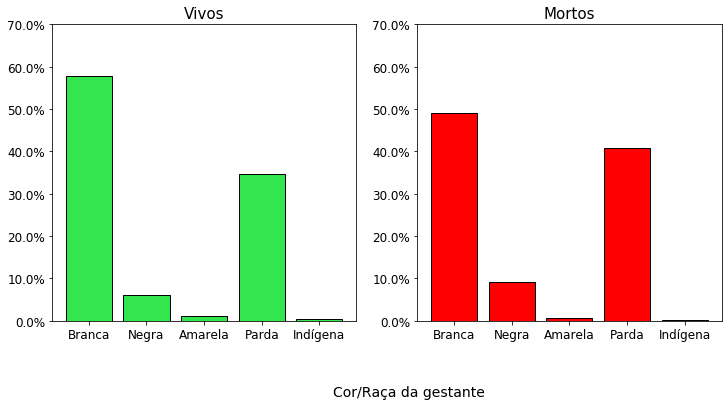

In [21]:
# coluna/variavel : n_tp_raca_cor_mae
# labels : ['Brancas', 'Negras', 'Amarelas', 'Pardas', 'Indígenas']

#função que filtra os dados e agrupa em categorias

def n_tp_raca_cor_mae(x): 
    if x == 1 : 
        return 'Branca' 
    elif x == 2: 
        return 'Negra'
    elif x == 3: 
        return 'Amarela'
    elif x == 4: 
        return 'Parda'
    else: 
        return 'Indígena'

#preparação dos dados para os gráficos

#mortos
n_tp_raca_cor_mae_dead = df_dead['n_tp_raca_cor_mae'].value_counts().rename("quantidade").sort_index().reset_index()
n_tp_raca_cor_mae_dead['index']=n_tp_raca_cor_mae_dead['index'].apply(n_tp_raca_cor_mae)
n_tp_raca_cor_mae_dead['quantidade']=n_tp_raca_cor_mae_dead['quantidade'].map(lambda x : (x/df_dead.shape[0])*100)
#n_tp_escolaridade_dead=n_tp_escolaridade_dead.sort_values(by='index')


#vivos
n_tp_raca_cor_mae_alive = df_alive['n_tp_raca_cor_mae'].value_counts().rename("quantidade").sort_index().reset_index()
n_tp_raca_cor_mae_alive['index']=n_tp_raca_cor_mae_alive['index'].apply(n_tp_raca_cor_mae)
n_tp_raca_cor_mae_alive['quantidade']=n_tp_raca_cor_mae_alive['quantidade'].map(lambda x : (x/df_alive.shape[0])*100)
#n_tp_escolaridade_alive=n_tp_gravidez_alive.sort_values(by='index')


#geração dos gráficos
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,12))

#plot de vivos
plot1 = plt.subplot(221)
plot1.bar(n_tp_raca_cor_mae_alive['index'], n_tp_raca_cor_mae_alive['quantidade'], color=(0.2,0.9,0.3), edgecolor='black')
plot1.set_ylim(0,70)
plot1.set_yticklabels(map('{:.1f}%'.format, plot1.yaxis.get_majorticklocs()), fontsize=12)
plot1.set_xticklabels(n_tp_raca_cor_mae_alive['index'], fontsize=12)
plot1.set_title('Vivos', fontsize=15)

#plot de mortos
plot2 = plt.subplot(222)
plot2.bar(n_tp_raca_cor_mae_dead['index'], n_tp_raca_cor_mae_dead['quantidade'], color='r', edgecolor='black')
plot2.set_ylim(0,70)
plot2.set_yticklabels(map('{:.1f}%'.format, plot2.yaxis.get_majorticklocs()), fontsize=12)
plot2.set_xticklabels(n_tp_raca_cor_mae_dead['index'], fontsize=12)
plot2.set_title('Mortos', fontsize=15)

fig.text(0.45,0.45, 'Cor/Raça da gestante',fontsize=14)

#antiga cor : 0.5,0.1,0.5,0.6

dst = "../img_saved/sp_pt/"
if os.path.isdir(dst) == False:
    os.makedirs(dst)
dst = dst + "/resultados-grafico5.png"
plt.savefig(dst)
plt.show()

# <font color='blue'>Variáveis Contínuas</font>

# Peso do bebê

Text(0.45, 0.45, 'Peso do bebê')

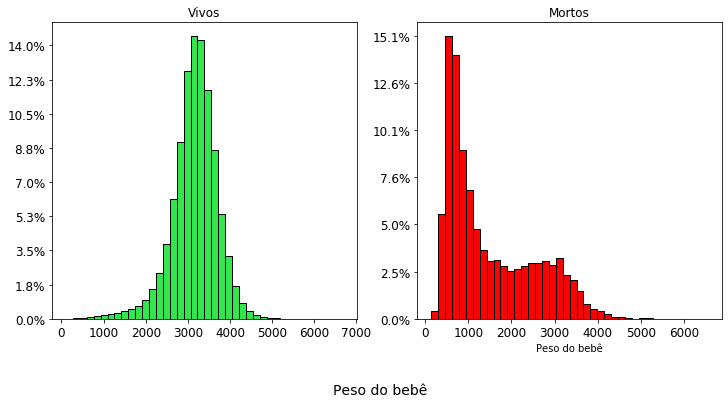

In [22]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,12))

##Alive Data
axis1 = plt.subplot(221)
axis1.hist(df_alive['n_nu_peso'],bins=40, color=(0.2,0.9,0.3),edgecolor='black')
axis1.yaxis.set_major_formatter(ticker.PercentFormatter(len(df_alive)))
axis1.grid(False)
axis1.set_title('Vivos', fontsize=12)

axis1.tick_params(axis ='both', labelsize=12)

axis2 = plt.subplot(222)
axis2.hist(df_dead['n_nu_peso'],bins=40, color='red',edgecolor='black')
axis2.yaxis.set_major_formatter(ticker.PercentFormatter(len(df_dead)))
#axis2.set_ylim(ticker.PercentFormatter(100));
axis2.grid(False)
axis2.set_title('Mortos', fontsize=12)
axis2.set_xlabel("Peso do bebê")

axis2.tick_params(axis ='both', labelsize=12)


fig.text(0.45,0.45, 'Peso do bebê',fontsize=14)

# Semana de Gestação

Text(0.45, 0.45, 'Semanas de Gestação')

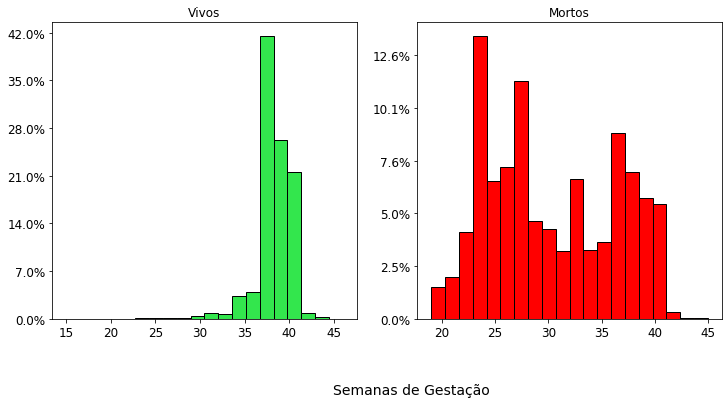

In [23]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,12))

##Alive Data
axis1 = plt.subplot(221)
axis1.hist(df_alive['n_nu_semana_gestacao'],bins=20, color=(0.2,0.9,0.3),edgecolor='black')
axis1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(df_alive)))
axis1.grid(False)
axis1.set_title('Vivos', fontsize=12)

axis1.tick_params(axis ='both', labelsize=12)

axis2 = plt.subplot(222)
axis2.hist(df_dead['n_nu_semana_gestacao'],bins=20, color='red',edgecolor='black')
axis2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(df_dead)))
axis2.grid(False)
axis2.set_title('Mortos', fontsize=12)

axis2.tick_params(axis ='both', labelsize=12)


fig.text(0.45,0.45, 'Semanas de Gestação',fontsize=14)

# Número de perdas fetais anteriores

Text(0.45, 0.45, 'Número de ocorridos')

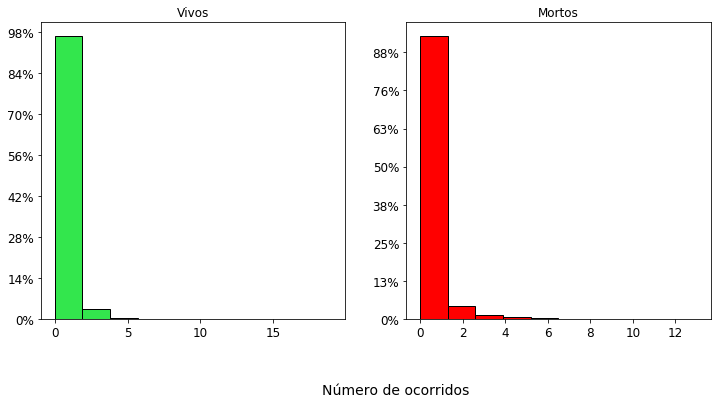

In [24]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,12))

##Alive Data
axis1 = plt.subplot(221)
axis1.hist(df_alive['n_qt_nascidos_mortos'],bins=10, color=(0.2,0.9,0.3),edgecolor='black')
axis1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(df_alive)))
axis1.grid(False)
axis1.set_title('Vivos', fontsize=12)

axis1.tick_params(axis ='both', labelsize=12)

axis2 = plt.subplot(222)
axis2.hist(df_dead['n_qt_nascidos_mortos'],bins=10, color='red',edgecolor='black')
axis2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(df_dead)))
axis2.grid(False)
axis2.set_title('Mortos', fontsize=12)

axis2.tick_params(axis ='both', labelsize=12)


fig.text(0.45,0.45, 'Número de ocorridos',fontsize=14)

# Idade da gestante

Text(0.45, 0.45, 'Idade')

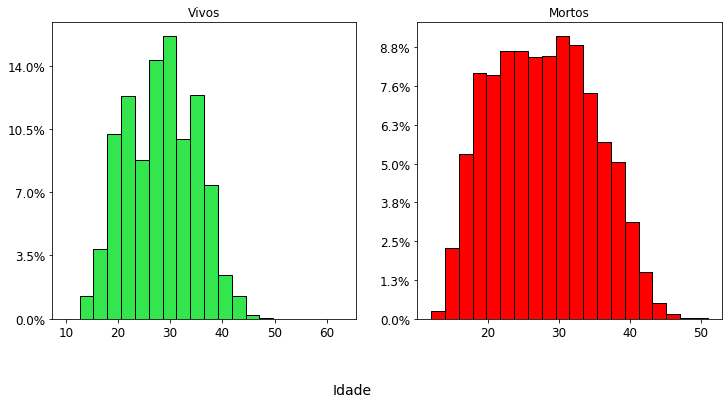

In [25]:

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,12))

##Alive Data
axis1 = plt.subplot(221)
axis1.hist(df_alive['n_nu_idade'],bins=20, color=(0.2,0.9,0.3),edgecolor='black')
axis1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(df_alive)))
axis1.grid(False)
axis1.set_title('Vivos', fontsize=12)

axis1.tick_params(axis ='both', labelsize=12)

axis2 = plt.subplot(222)
axis2.hist(df_dead['n_nu_idade'],bins=20, color='red',edgecolor='black')
axis2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(df_dead)))
axis2.grid(False)
axis2.set_title('Mortos', fontsize=12)

axis2.tick_params(axis ='both', labelsize=12)


fig.text(0.45,0.45, 'Idade',fontsize=14)